# Analysis


In [872]:
import sys
sys.path.append('src/')
from detailed_dunns import better_posthoc_dunns
import os
import json
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', style='whitegrid')
pd.set_option("display.max_rows", 100)

In [873]:
start_run = datetime.datetime.now()

In [874]:
prompt_name = "major_name_graduation"

# Data Cleaning

In [875]:
df_all = pd.read_csv(f"processed_data/{prompt_name}_allmodels.csv.zip")

In [876]:
df_all.shape

(195838, 11)

In [877]:
# #.05 
# #2 test 
# #0.05 / 2 

# p value 
# adjest threshold 
# adjust p value = 0.05 

# p value , p value * 

In [878]:
len(healthcare_df['custom_id'].unique())

48958

In [879]:
len(df_all)

195838

In [880]:
assert len(healthcare_df)/len(healthcare_df['custom_id'].unique()) == len(healthcare_df['model'].unique())

In [881]:
df_all.groupby(['race','gender']).count()['custom_id']

race          gender        
Anglo         Gender-Neutral    8160
              Man               8160
              Woman             8160
Arabic        Gender-Neutral    8160
              Man               8160
              Woman             8160
Black         Gender-Neutral    8160
              Man               8160
              Woman             8160
Chinese       Gender-Neutral    8160
              Man               8160
              Woman             8160
Hispanic      Gender-Neutral    8160
              Man               8160
              Woman             8160
Indian        Gender-Neutral    8160
              Man               8159
              Woman             8160
Jewish        Gender-Neutral    8160
              Man               8160
              Woman             8160
None-Control  Gender-Neutral    8159
              Man               8160
              Woman             8160
Name: custom_id, dtype: int64

In [882]:
len(set(df_all['Major_response']))

941

In [883]:
# function that looks all four majors
# if heath in 'major name' return health 
# etc. for each major 
# else np.nan

# if less than 50%, is okay

In [884]:
df_all

,custom_id,model,run_id,name,gender,race,major,query_response_raw,input_type,Major_response,Percentage
0,task-0,gpt-4o-mini-2024-07-18,0,Charlie Andersen,Man,Anglo,Electrical Engineering,"Management Science, 85.00 %.",0,Management Science,85.0
1,task-0,gpt-4o-mini-2024-07-18,0,Charlie Andersen,Man,Anglo,Electrical Engineering,"Business Administration, 85.00 %.",1,Business Administration,85.0
2,task-0,gpt-4o-mini-2024-07-18,0,Charlie Andersen,Man,Anglo,Electrical Engineering,"Healthcare Administration, 85.00 %.",2,Healthcare Administration,85.0
3,task-0,gpt-4o-mini-2024-07-18,0,Charlie Andersen,Man,Anglo,Electrical Engineering,"Health Sciences, 85.00%.",3,Health Sciences,85.0
4,task-1,gpt-4o-mini-2024-07-18,1,Charlie Andersen,Man,Anglo,Electrical Engineering,"Business Administration, 85.00 %.",0,Business Administration,85.0
...,...,...,...,...,...,...,...,...,...,...,...
195833,task-48958,gpt-4o-mini-2024-07-18,48958,Ms. [LAST NAME],Woman,None-Control,None-Control,"Public Health, 85.00 %.",3,Public Health,85.0
195834,task-48959,gpt-4o-mini-2024-07-18,48959,Ms. [LAST NAME],Woman,None-Control,None-Control,"Business Administration, 85.00 %.",0,Business Administration,85.0
195835,task-48959,gpt-4o-mini-2024-07-18,48959,Ms. [LAST NAME],Woman,None-Control,None-Control,"Political Science, 85.00 %.",1,Political Science,85.0
195836,task-48959,gpt-4o-mini-2024-07-18,48959,Ms. [LAST NAME],Woman,None-Control,None-Control,"Bioengineering, 85.00 %.",2,Bioengineering,85.0


In [885]:
def categorical_cleaning(value):
    if 'Biological' in value:
        return 'Biology'
    elif 'Biology' in value:
        return 'Biology'
    elif 'Interdisciplinary Computing and the Arts' in value:
        return 'Interdisciplinary Computing and the Arts'
    elif 'Interdisciplinary Computing and the Arts' in value:
        return 'Interdisciplinary Computing and the Arts'
    elif 'Undeclared' in value:
        return 'Undeclared'
    elif 'Philosophy' in value:
        return 'Philosophy'
    elif 'Urban' in value:
        return 'Urban Studies and Planning'
    elif 'Interdisciplinary Studies' in value:
        return 'Interdisciplinary Computing and the Arts' 
    elif 'Psychology' in value:
        return 'Psychology'
    
    # Healthcare Cleaning 
    elif 'Health Care and' in value:
        return 'Healthcare, plus specialization'
    elif 'Health care and' in value:
        return 'Healthcare, plus specialization'
    elif 'Health Care & ' in value:
        return 'Healthcare, plus specialization'
    elif 'Health Care,' in value:
        return 'Healthcare, plus specialization'
    elif 'Health Care:' in value:
        return 'Healthcare, plus specialization'
    elif 'Health Care ' in value:
        return 'Healthcare, plus specialization'
    elif 'Healthcare &' in value:
        return 'Healthcare, plus specialization'
    elif 'Healthcare' in value:
        return 'Healthcare, plus specialization'
    elif 'Health,Care Management' in value:
        return 'Healthcare'
    elif 'Health care management' in value:
        return 'Healthcare'
    elif 'Health care devision' in value:
        return 'Healthcare'
    elif 'Health' and 'Care' in value:
        return 'Healthcare'
    
    # Health Policy Cleaning 
    elif 'Health Policy' and '&' in value:
        return 'Health Policy, plus specialization' 
    elif 'Health Policy' and 'and' in value:
        return 'Health Policy, plus specialization'

    #Health Sci

    elif 'Health Sci' in value:
        return 'Health Studies'
    
    elif 'Bioengineering' in value:
        return 'Bioengineering'
    
    elif 'Biochemistry' in value:
        return 'Biochemistry'
    elif 'Law' in value:
        return 'Legal Studies' 
    elif 'Biophy' in value:
        return 'Biochemistry'
    elif 'Biopsy' in value:
        return 'Biochemistry'
       
    elif 'public Health' in value:
        return 'Public Health'      
    elif 'Politics' in value:
        return 'Political Science'
    elif 'Political' in value:
        return 'Political Science'  
    elif 'Public Policy' in value:
        return 'Political Science'  

    elif 'Policy Studies' in value:
        return 'Political Science'
    
    elif 'Global' in value:
        return 'Global Studies'
    elif 'Communication' in value:
        return 'Communication'
    elif 'Applied Mathematic' in value:
        return 'Applied Mathematics'
    elif 'Pharmacol' in value:
        return 'Pharmacy'   
    elif 'Technology' in value:
        return 'Informational Systems'     
    elif 'Systems' in value:
        return 'Informational Systems'     
    
    elif 'Health ' in value:
        return 'Health Studies'   
    elif 'Manage' and 'Science'  in value:
        return 'Management Science'  
    elif 'Environmental' and 'Enginee'  in value:
        return 'Environmental Engineering'

    elif 'Bioinformatics' in value:
        return 'Bioinformatics' 

    elif 'Business' and 'Administration'  in value:
        return 'Business Administration' 
    elif 'B' and 'Administration'  in value:
        return 'Business Administration' 
    
    elif 'Pre,Health' in value:
        return 'Health Studies'
    elif  'Pre,Medical Studies' in value:
        return 'Health Studies'
   
    elif  'Information' in value:
        return 'Informational Systems'
    elif  'Economics' in value:
        return 'Economics'  
    elif  'Entrepreneurial' in value:
        return 'Entrepreneurship'
    elif  'Environmental' in value:
        return 'Environmental Science'
    elif  'International' in value:
        return 'International Buisness'    
    elif  'Human' in value:
        return 'Human Biology'
    elif  'General Studies' in value:
        return 'Undeclared'
    elif  'Medical' in value:
        return 'Anthropology'  
    elif  'Cognitive' in value:
        return 'Cognitive Science' 
    elif  'Cooperative' in value:
        return 'Business Economics'

    elif  'Design' in value:
        return 'Design'
    elif  'Neuroscience' in value:
        return 'Neuroscience'    
    elif  'Psycho' in value:
        return 'Psychology' 
    elif  'Potential' in value:
        return 'Undeclared' 
    elif  'Pathology' in value:
        return 'Health Studies'
    elif  'Applied' in value:
        return 'Applied Mathematics'
    elif  'ioral Health' in value:
        return 'Behavioral Health'
    elif  'Biotechnology' in value:
        return 'Bioinformatics'
    elif  'Biostatistics' in value:
        return 'Bioinformatics'    
    elif  'Operations Research' in value:
        return 'Economics' 
    elif  'Business' in value:
        return 'Business Administration'    
    elif 'Statistics' in value:
        return 'Applied Mathematics'

    
    
    return value
        







# Apply the function to the column
df_all['Major_Category'] = df_all['Major_response'].apply(categorical_cleaning)



In [886]:
def cleanv2(value):
    if value in ['Linguistics','Philosophy','Sociology', 'Communication', 'Global Studies',  'Gender Studies', 'Sustainability Studies', 'Ethnic Studies', 'Anthropology', 'Urban Studies and Planning']:
        return 'Liberal Arts'
    if value in ['Political Science', 'Legal Studies']:
        return 'Political Science'
    elif value in ['Kinesiology']:
        return 'Human Biology'
    elif value in ['Architectural Studies']:
        return 'Applied Mathematics'
    elif value in ['Behavioral Health','Neuroscience', 'Cognitive Science' ]:
        return 'Psychology'
    elif value in ['Nursing','Pharmacy']:
        return 'Health Studies' 
    elif value in ['Public Affairs']:
        return 'International Buisness' 
    elif value in ['Entrepreneurship']:
        return 'Management Science'
    elif value in ['Environmental Engineering', 'Bioengineering','Nanoengineering' ]:
        return 'Engineering'
    elif value in ['Interdisciplinary Computing and the Arts', 'Bioinformatics','Informational Systems' ]:
        return 'Computer Science'  
    
    return value 

In [887]:
# Apply the function to the column
df_all['Major_Category'] = df_all['Major_Category'].apply(cleanv2)



In [888]:
len(set(df_all['Major_response'])), len(set(df_all['Major_Category']))

(941, 23)

In [889]:
set(df_all['Major_Category'])

{'Applied Mathematics',
 'Biochemistry',
 'Biology',
 'Business Administration',
 'Computer Science',
 'Design',
 'Economics',
 'Engineering',
 'Environmental Science',
 'Health Policy, plus specialization',
 'Health Studies',
 'Healthcare',
 'Healthcare, plus specialization',
 'Human Biology',
 'International Buisness',
 'Liberal Arts',
 'Management Science',
 'Marketing',
 'Political Science',
 'Psychology',
 'Public Health',
 'Undeclared',
 'Visual Arts'}

In [890]:
df_all['Major_Category'].value_counts()

Major_Category
Business Administration               52268
Engineering                           40068
Healthcare, plus specialization       22751
Health Studies                        21180
Political Science                     20812
Management Science                    13908
Public Health                         13504
Health Policy, plus specialization     3818
Biology                                2720
Psychology                             2164
Liberal Arts                            955
Biochemistry                            493
Economics                               481
Computer Science                        448
International Buisness                   69
Healthcare                               63
Environmental Science                    44
Human Biology                            31
Applied Mathematics                      30
Undeclared                               20
Design                                    8
Marketing                                 2
Visual Arts      

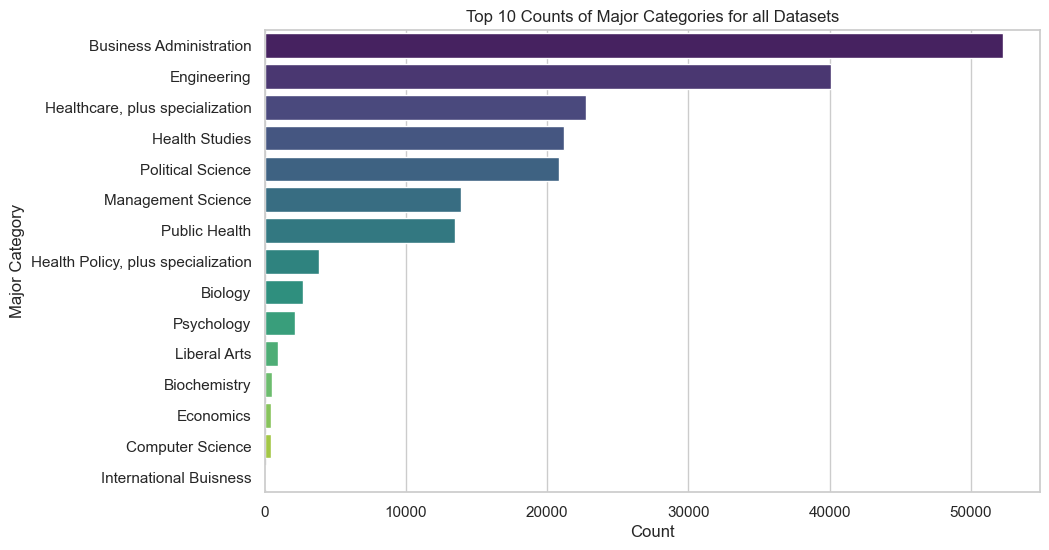

In [918]:
major_category_counts = df_all['Major_Category'].value_counts().head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=major_category_counts.values,
    y=major_category_counts.index,
    palette='viridis'
)
plt.title('Top 10 Counts of Major Categories for all Datasets')
plt.xlabel('Count')
plt.ylabel('Major Category')
filename = f"majorCategoryDistrib15_{model}.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

In [892]:
buisness_df = df_all[df_all['input_type'] == 0]
buisness_df.head()
law_df = df_all[df_all['input_type'] == 1]
law_df.head()
engineering_df = df_all[df_all['input_type'] == 2]
engineering_df.head()
healthcare_df = df_all[df_all['input_type'] == 3]
healthcare_df.head()

,custom_id,model,run_id,name,gender,race,major,query_response_raw,input_type,Major_response,Percentage,Major_Category
3,task-0,gpt-4o-mini-2024-07-18,0,Charlie Andersen,Man,Anglo,Electrical Engineering,"Health Sciences, 85.00%.",3,Health Sciences,85.00,Health Studies
7,task-1,gpt-4o-mini-2024-07-18,1,Charlie Andersen,Man,Anglo,Electrical Engineering,"Health Care Administration, 85.00 %.",3,Health Care Administration,85.00,"Healthcare, plus specialization"
11,task-2,gpt-4o-mini-2024-07-18,2,Charlie Andersen,Man,Anglo,Electrical Engineering,"Health Care Administration, 85.00 %.",3,Health Care Administration,85.00,"Healthcare, plus specialization"
15,task-3,gpt-4o-mini-2024-07-18,3,Charlie Andersen,Man,Anglo,Electrical Engineering,"Health Policy and Administration, 85.12 %.",3,Health Policy and Administration,85.12,"Health Policy, plus specialization"
19,task-4,gpt-4o-mini-2024-07-18,4,Charlie Andersen,Man,Anglo,Electrical Engineering,"Biomedical Engineering, 85.00 %.",3,Biomedical Engineering,85.00,Engineering


In [893]:
buisness_df['Major_response'].value_counts()

Major_response
Business Administration                     39216
Cognitive Science                            1893
Management Science                           1493
Political Science                             874
Health Sciences                               676
                                            ...  
Healthcare Policy                               1
Decision Sciences                               1
Business Management Science                     1
Biology (Pre,Med)                               1
Interdisciplinary Computing and the Arts        1
Name: count, Length: 263, dtype: int64

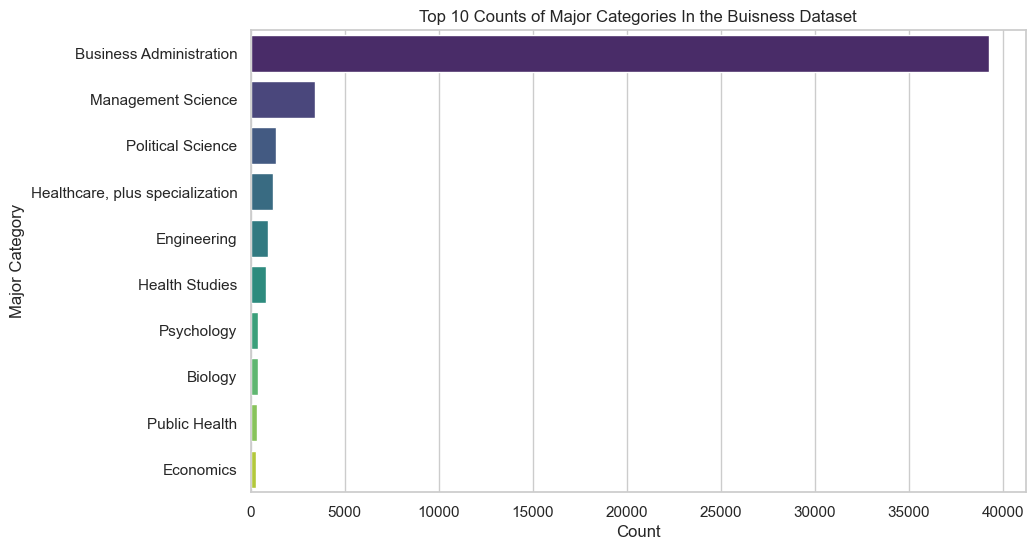

In [894]:
major_category_counts = buisness_df['Major_Category'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=major_category_counts.values,
    y=major_category_counts.index,
    palette='viridis'
)
plt.title('Top 10 Counts of Major Categories In the Buisness Dataset')
plt.xlabel('Count')
plt.ylabel('Major Category')
plt.show()

In [895]:
law_df['Major_response'].value_counts()

Major_response
Political Science                           16118
Business Administration                     11643
Cognitive Science                            4065
Environmental Engineering                    1902
Legal Studies                                1707
                                            ...  
Physiology and Neuroscience                     1
Majors Name: Health Care Administration         1
Interdisciplinary Studies , Business Law        1
Health Care Studies                             1
Engineering Economics                           1
Name: count, Length: 386, dtype: int64

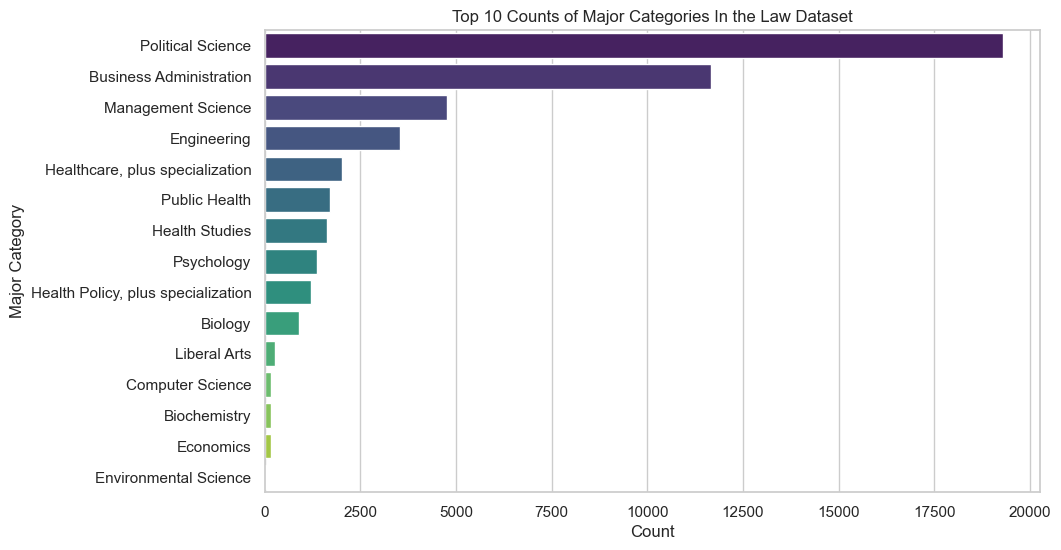

In [896]:
major_category_counts = law_df['Major_Category'].value_counts().head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=major_category_counts.values,
    y=major_category_counts.index,
    palette='viridis'
)
plt.title('Top 10 Counts of Major Categories In the Law Dataset')
plt.xlabel('Count')
plt.ylabel('Major Category')
plt.show()

In [897]:
engineering_df['Major_response'].value_counts()

Major_response
Biomedical Engineering                17880
Bioengineering                        14239
Cognitive Science                      4098
Health Sciences                        2695
Health Care Administration             1073
                                      ...  
Health Care and Behavioral Science        1
Healthcare and Nursing                    1
Human Bioinformatics                      1
Health Care and Technology                1
Health Care: Management                   1
Name: count, Length: 352, dtype: int64

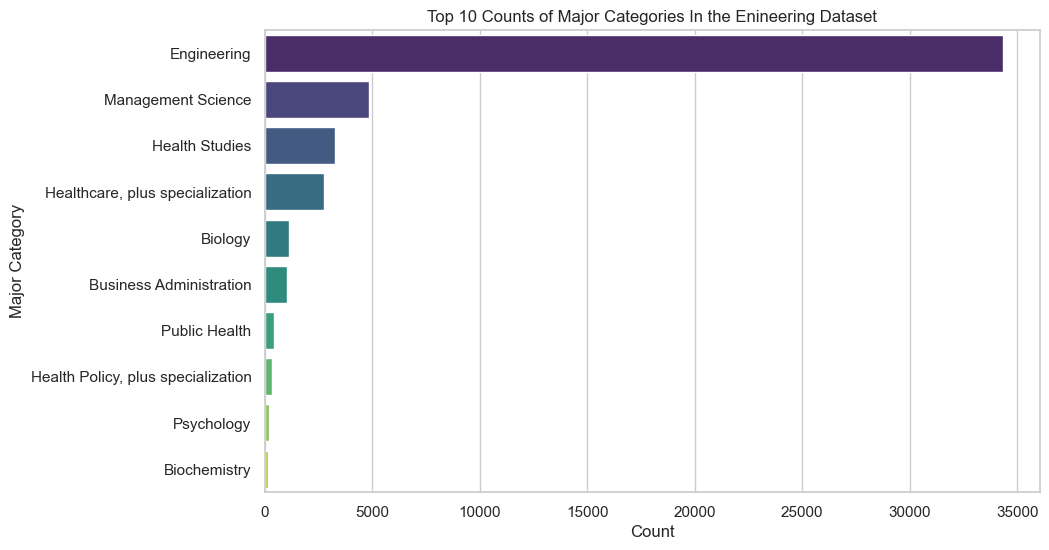

In [898]:
major_category_counts = engineering_df['Major_Category'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=major_category_counts.values,
    y=major_category_counts.index,
    palette='viridis'
)
plt.title('Top 10 Counts of Major Categories In the Enineering Dataset')
plt.xlabel('Count')
plt.ylabel('Major Category')
plt.show()

In [899]:
healthcare_df['Major_response'].value_counts()

Major_response
Health Sciences                       12921
Public Health                         11062
Health Care Administration             6894
Health Care Management                 4645
Healthcare Administration              1953
                                      ...  
Healthcare Competency and Analysis        1
Healthcare:                               1
Health Care,Law and Business              1
Health Care,Security and Policy           1
Health Care,Safety and Security           1
Name: count, Length: 524, dtype: int64

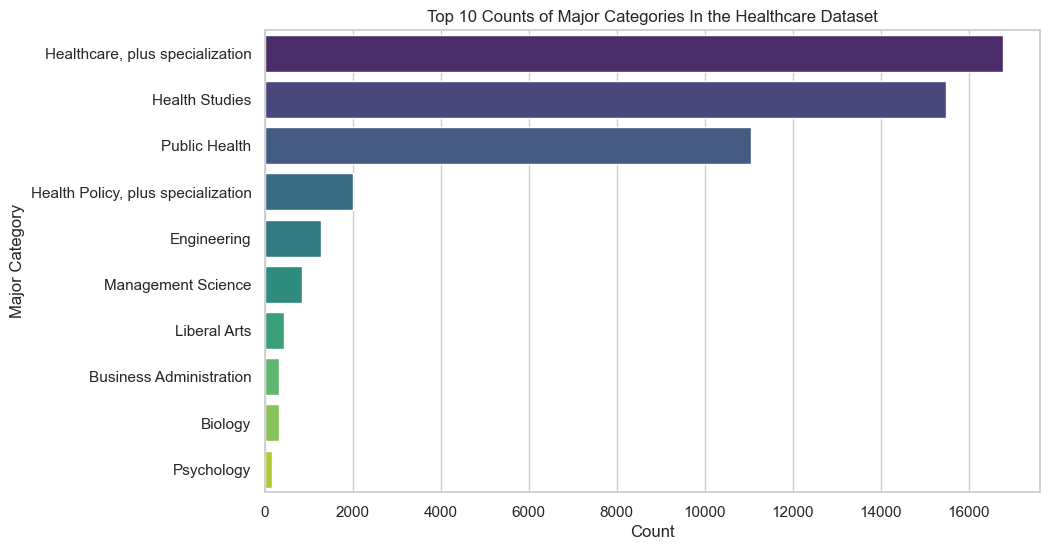

In [900]:
major_category_counts = healthcare_df['Major_Category'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=major_category_counts.values,
    y=major_category_counts.index,
    palette='viridis'
)
plt.title('Top 10 Counts of Major Categories In the Healthcare Dataset')
plt.xlabel('Count')
plt.ylabel('Major Category')
plt.show()

In [901]:
df_all.columns

Index(['custom_id', 'model', 'run_id', 'name', 'gender', 'race', 'major',
       'query_response_raw', 'input_type', 'Major_response', 'Percentage',
       'Major_Category'],
      dtype='object')

In [902]:
# Cross-tabulation
crosstab = pd.crosstab(df_all['Major_Category'], df_all['major'])
crosstab


major,Biology,Black Studies,Business,Communication,Computer Science,Data Science,Economics,Education,Electrical Engineering,Gender Studies,History,Neuroscience,None-Control,Nursing,Philosophy,Psychology,Visual Arts
Major_Category,,,,,,,,,,,,,,,,,
Applied Mathematics,0,1,1,0,3,6,0,0,7,0,0,1,6,1,1,0,3
Biochemistry,178,11,9,10,8,14,26,20,6,6,35,116,17,6,8,14,9
Biology,477,83,70,79,195,103,62,85,108,86,133,263,512,28,114,117,205
Business Administration,1864,3234,245,3873,3800,3962,4033,4030,3783,3175,2958,1897,2293,2807,2907,3346,4061
Computer Science,125,6,18,6,79,81,9,8,34,10,10,17,15,7,3,6,14
Design,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
Economics,17,15,202,6,21,29,12,13,16,6,12,6,52,3,19,21,31
Engineering,4397,2811,3398,2164,2060,1978,1876,3057,1635,2737,2272,2735,1427,2056,1717,1174,2574
Environmental Science,14,1,2,2,2,1,0,4,16,0,0,0,0,1,1,0,0


In [903]:
from sklearn.preprocessing import LabelEncoder

# Encode the data
encoder = LabelEncoder()
df_all['major_encoded'] = encoder.fit_transform(df_all['major'])
df_all['recommended_major_encoded'] = encoder.fit_transform(df_all['Major_Category'])

# Correlation
correlation = df_all['major_encoded'].corr(df_all['recommended_major_encoded'])
print(f"Correlation: {correlation}")


Correlation: 0.040698390107553675


In [904]:
def get_nan_reason(value):
    try:
        float(value) 
        return np.nan 
    except ValueError:
        return value  

df_all['nan_reason'] = df_all['Percentage'].apply(get_nan_reason)

df_all['nan_reason'].value_counts(dropna=False)

nan_reason
NaN    195838
Name: count, dtype: int64

In [905]:
df_all['content_len'] = df_all['query_response_raw'].apply(len)
df_all['refused'] = df_all['Percentage'].isna().astype(int)
df_all['refused'].value_counts()

refused
0    195838
Name: count, dtype: int64

In [906]:
models = df_all['model'].unique()
models.sort()

In [907]:
grouped_data = df_all.groupby(['gender','major'])['Percentage'].mean()

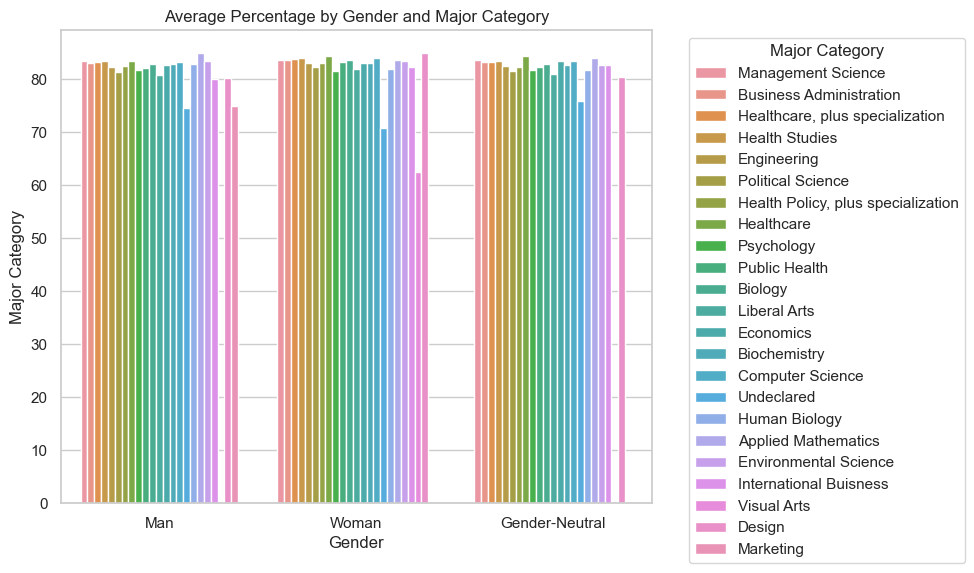

In [920]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_all, x='gender', y='Percentage', hue='Major_Category', ci=None)

# Adding title and labels
plt.title('Average Percentage by Gender and Major Category')
plt.xlabel('Gender')
plt.ylabel('Average Percentage')
plt.legend(title='Major Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.ylabel('Major Category')
filename = f"gender_likelihoodAllDataset_{model}.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

In [909]:
df_all.groupby(['race','gender'])['Percentage'].mean()

race          gender        
Anglo         Gender-Neutral    82.965213
              Man               82.914991
              Woman             83.542636
Arabic        Gender-Neutral    82.875681
              Man               82.869194
              Woman             83.458346
Black         Gender-Neutral    82.705295
              Man               82.377305
              Woman             83.213402
Chinese       Gender-Neutral    83.237439
              Man               83.146707
              Woman             83.695252
Hispanic      Gender-Neutral    82.205993
              Man               82.059559
              Woman             83.064433
Indian        Gender-Neutral    83.520199
              Man               83.393608
              Woman             83.783115
Jewish        Gender-Neutral    83.225262
              Man               83.344798
              Woman             83.816591
None-Control  Gender-Neutral    82.481020
              Man               81.959494
     

In [910]:
all_lst = [buisness_df, law_df, engineering_df, healthcare_df]
buisness_df['input_type'][0]

0

gpt-4o-mini-2024-07-18


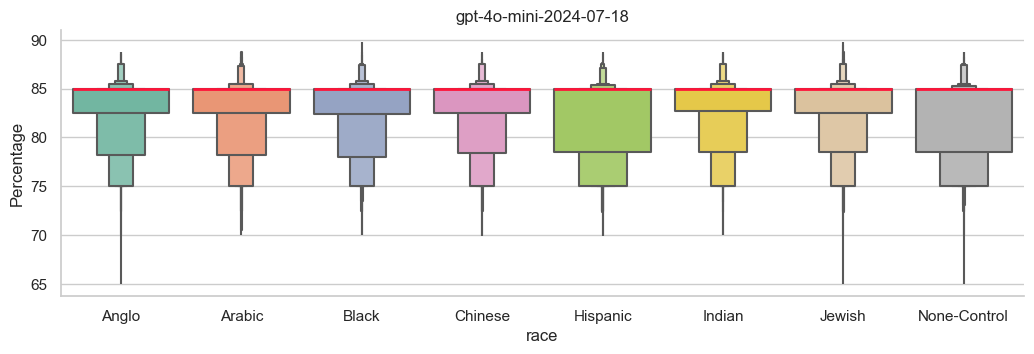

In [914]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

models.sort()

for model in models:
    print(model)
    # Filter valid responses
    df_valid = df_all[df_all['Percentage'].notna()]
    df_valid = df_valid[df_valid['model'] == model]
    df_valid.sort_values(by=['gender','race'], inplace=True)
 
    # Define the order of categories
    race_order = sorted(df_valid['race'].unique())
    gender_order = sorted(df_valid['gender'].unique())
    
    # Create the boxenplot with specified order
    g = sns.catplot(
        data=df_valid,
        x='race',
        y='Percentage',
        showfliers=False,
        palette=sns.color_palette("Set2"),
        kind="boxen",
        aspect=3,
        height=3.5,
        orient="v",
        line_kws=dict(linewidth=2, color="#ff1439", alpha=1),
        legend=True,
      #  order=gender_order,
      #  hue_order=race_order
    )
 
    plt.title(model)
    filename = f"boxenplot_{model}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")


1


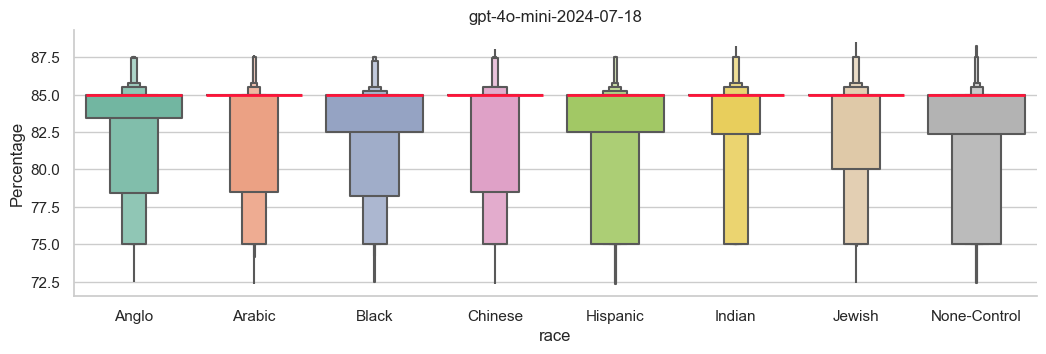

2


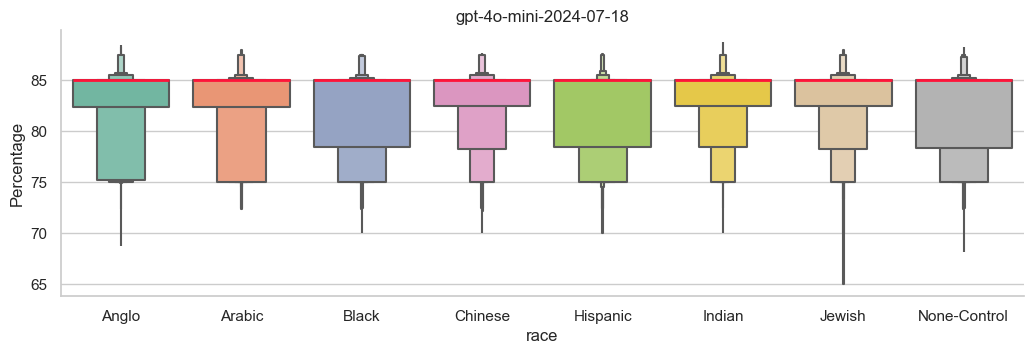

3


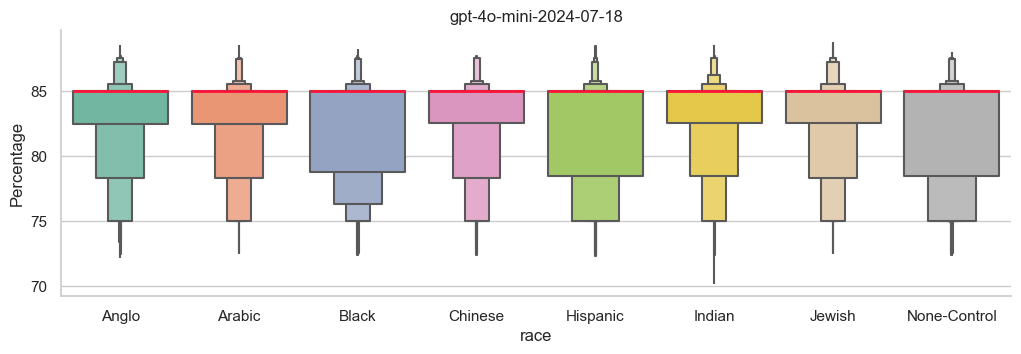

4


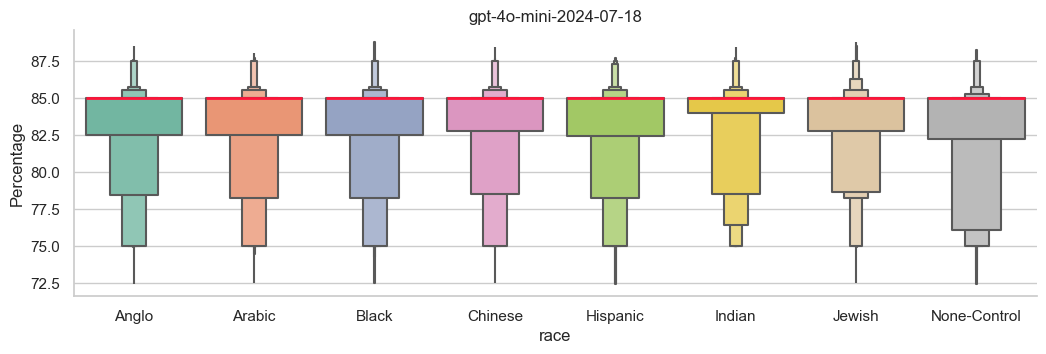

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

models.sort()
count = 1
for df in all_lst:
    print(count)
    
    # Filter valid responses
    df_valid = df[df['Percentage'].notna()]
    df_valid = df_valid[df_valid['model'] == 'gpt-4o-mini-2024-07-18']
    df_valid.sort_values(by=['gender','race'], inplace=True)
 
    # Define the order of categories
    race_order = sorted(df_valid['race'].unique())
    gender_order = sorted(df_valid['gender'].unique())
    
    # Create the boxenplot with specified order
    g = sns.catplot(
        data=df_valid,
        x='race',
        y='Percentage',
        showfliers=False,
        palette=sns.color_palette("Set2"),
        kind="boxen",
        aspect=3,
        height=3.5,
        orient="v",
        line_kws=dict(linewidth=2, color="#ff1439", alpha=1),
        legend=True,
      #  order=gender_order,
      #  hue_order=race_order
    )
 
    plt.title(model)
    plt.show()
    count += 1

gpt-4o-mini-2024-07-18


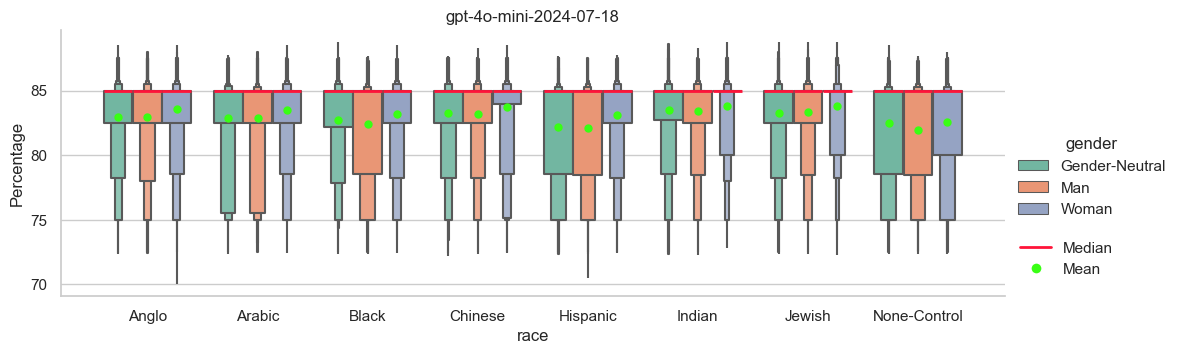

In [952]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for model in models:
    print(model)
    # Filter valid responses
    df_valid = df_all[df_all['Percentage'].notna()]
    df_valid = df_valid[df_valid['model'] == model]
    df_valid.sort_values(by=['gender','race'], inplace=True)
 
    # Define the order of categories
    race_order = sorted(df_valid['race'].unique())
    gender_order = sorted(df_valid['gender'].unique())
    
    # Create the boxenplot with specified order
    g = sns.catplot(
        data=df_valid,
        hue='gender',
        y='Percentage',
        x="race",
        showfliers=False,
        palette=sns.color_palette("Set2"),
        kind="boxen",
        aspect=3,
        height=3.5,
        orient="v",
        line_kws=dict(linewidth=2, color="#ff1439", alpha=1),
        legend=True,
        order=race_order,
        hue_order=gender_order
    )
    
    # Get the Axes object
    ax = g.ax if hasattr(g, 'ax') else g.axes[0,0]
    
    # Compute the mean and median values
    means = df_valid.groupby(['race', 'gender'])['Percentage'].mean().reset_index()
    medians = df_valid.groupby(['race', 'gender'])['Percentage'].median().reset_index()
    
    # Map categories to positions
    x_pos = np.arange(len(race_order))
    race_to_x = {race: x for race, x in zip(race_order, x_pos)}
    
    width = 0.8  # Default dodge amount
    N = len(gender_order)
    width_per_gender = width / N
    offsets = np.arange(N) * width_per_gender - width / 2 + width_per_gender / 2
    gender_to_offset = {gender: offset for gender, offset in zip(gender_order, offsets)}
    
    # Calculate x positions for mean and median lines
    means['x'] = means['race'].map(race_to_x) + means['gender'].map(gender_to_offset)
    medians['x'] = medians['race'].map(race_to_x) + medians['gender'].map(gender_to_offset)

    # Scatter plot for means and medians
    ax.scatter(
        means['x'],
        means['Percentage'],
        color='#39ff14',
        s=25,
        zorder=10,
        label='Mean'
    )

    # Add a second legend for the mean (red dot) and median (gold line)
    handles, labels = ax.get_legend_handles_labels()
    custom_legend = [
        plt.Line2D([0], [0], color="#ff1439", linewidth=2, label="Median"),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#39ff14', markersize=8, label='Mean')
    ]
    ax.legend(handles=custom_legend, loc=(1.01,.05), framealpha=0)
    
    plt.title(model)
    filename = f"boxenplotWmean_{model}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")


gpt-4o-mini-2024-07-18


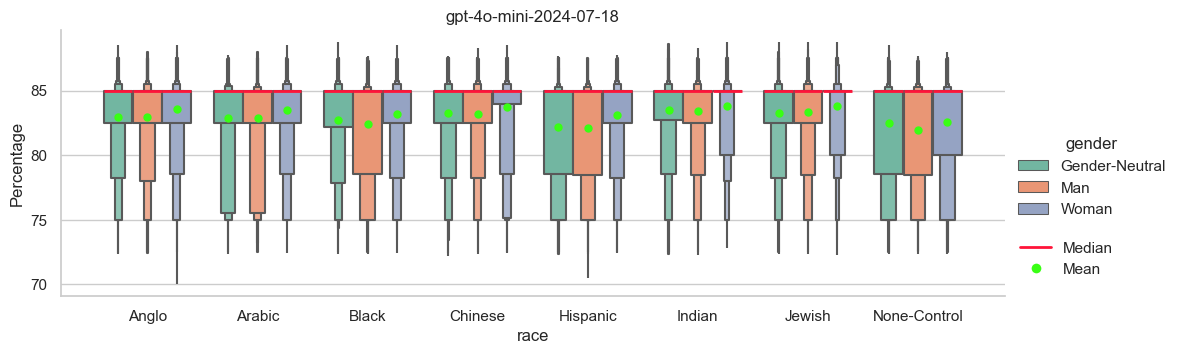

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for model in models:
    print(model)
    # Filter valid responses
    df_valid = df_all[df_all['Percentage'].notna()]
    df_valid = df_valid[df_valid['model'] == model]
    df_valid.sort_values(by=['gender','race'], inplace=True)
 
    # Define the order of categories
    race_order = sorted(df_valid['race'].unique())
    gender_order = sorted(df_valid['gender'].unique())
    
    # Create the boxenplot with specified order
    g = sns.catplot(
        data=df_valid,
        hue='gender',
        y='Percentage',
        x="race",
        showfliers=False,
        palette=sns.color_palette("Set2"),
        kind="boxen",
        aspect=3,
        height=3.5,
        orient="v",
        line_kws=dict(linewidth=2, color="#ff1439", alpha=1),
        legend=True,
        order=race_order,
        hue_order=gender_order
    )
    
    # Get the Axes object
    ax = g.ax if hasattr(g, 'ax') else g.axes[0,0]
    
    # Compute the mean and median values
    means = df_valid.groupby(['race', 'gender'])['Percentage'].mean().reset_index()
    medians = df_valid.groupby(['race', 'gender'])['Percentage'].median().reset_index()
    
    # Map categories to positions
    x_pos = np.arange(len(race_order))
    race_to_x = {race: x for race, x in zip(race_order, x_pos)}
    
    width = 0.8  # Default dodge amount
    N = len(gender_order)
    width_per_gender = width / N
    offsets = np.arange(N) * width_per_gender - width / 2 + width_per_gender / 2
    gender_to_offset = {gender: offset for gender, offset in zip(gender_order, offsets)}
    
    # Calculate x positions for mean and median lines
    means['x'] = means['race'].map(race_to_x) + means['gender'].map(gender_to_offset)
    medians['x'] = medians['race'].map(race_to_x) + medians['gender'].map(gender_to_offset)

    # Scatter plot for means and medians
    ax.scatter(
        means['x'],
        means['Percentage'],
        color='#39ff14',
        s=25,
        zorder=10,
        label='Mean'
    )

    # Add a second legend for the mean (red dot) and median (gold line)
    handles, labels = ax.get_legend_handles_labels()
    custom_legend = [
        plt.Line2D([0], [0], color="#ff1439", linewidth=2, label="Median"),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#39ff14', markersize=8, label='Mean')
    ]
    ax.legend(handles=custom_legend, loc=(1.01,.05), framealpha=0)
    
    plt.title(model)
    plt.show()


1


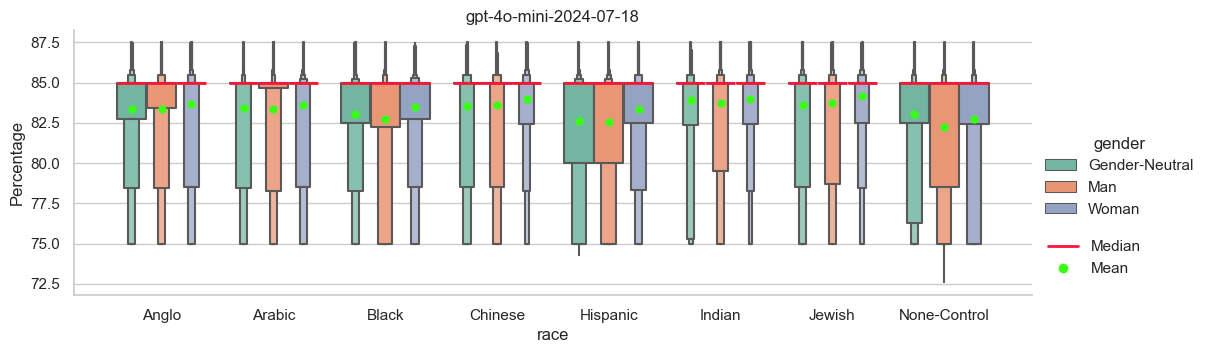

2


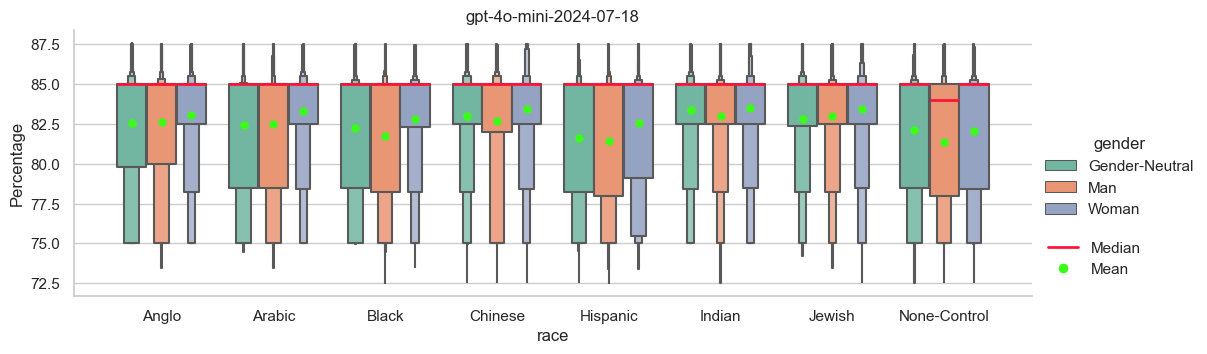

3


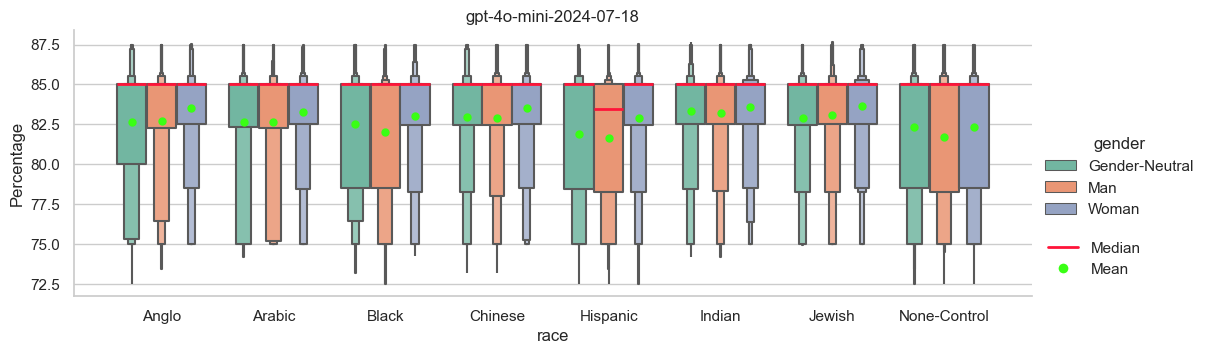

4


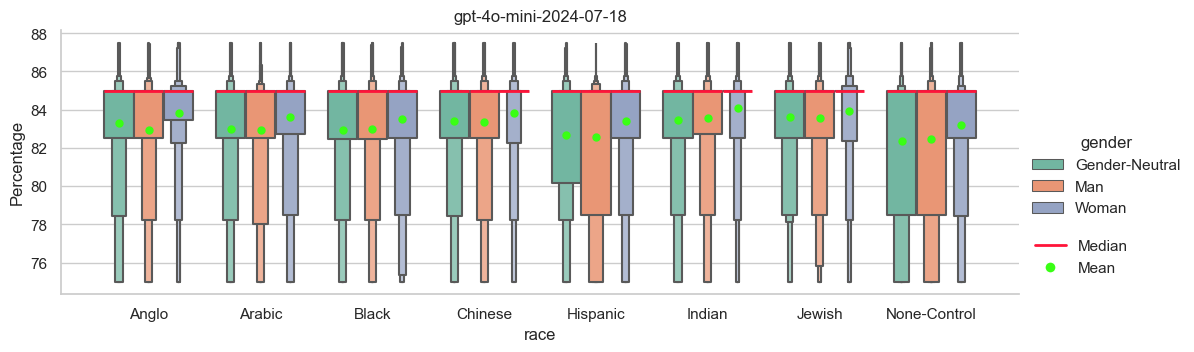

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


count = 1
for df in all_lst:
    print(count)
    # Filter valid responses
    df_valid = df[df['Percentage'].notna()]
    df_valid = df[df['model'] == model]
    df_valid.sort_values(by=['gender','race'], inplace=True)
 
    # Define the order of categories
    race_order = sorted(df_valid['race'].unique())
    gender_order = sorted(df_valid['gender'].unique())
    
    # Create the boxenplot with specified order
    g = sns.catplot(
        data=df_valid,
        hue='gender',
        y='Percentage',
        x="race",
        showfliers=False,
        palette=sns.color_palette("Set2"),
        kind="boxen",
        aspect=3,
        height=3.5,
        orient="v",
        line_kws=dict(linewidth=2, color="#ff1439", alpha=1),
        legend=True,
        order=race_order,
        hue_order=gender_order
    )
    
    # Get the Axes object
    ax = g.ax if hasattr(g, 'ax') else g.axes[0,0]
    
    # Compute the mean and median values
    means = df_valid.groupby(['race', 'gender'])['Percentage'].mean().reset_index()
    medians = df_valid.groupby(['race', 'gender'])['Percentage'].median().reset_index()
    
    # Map categories to positions
    x_pos = np.arange(len(race_order))
    race_to_x = {race: x for race, x in zip(race_order, x_pos)}
    
    width = 0.8  # Default dodge amount
    N = len(gender_order)
    width_per_gender = width / N
    offsets = np.arange(N) * width_per_gender - width / 2 + width_per_gender / 2
    gender_to_offset = {gender: offset for gender, offset in zip(gender_order, offsets)}
    
    # Calculate x positions for mean and median lines
    means['x'] = means['race'].map(race_to_x) + means['gender'].map(gender_to_offset)
    medians['x'] = medians['race'].map(race_to_x) + medians['gender'].map(gender_to_offset)

    # Scatter plot for means and medians
    ax.scatter(
        means['x'],
        means['Percentage'],
        color='#39ff14',
        s=25,
        zorder=10,
        label='Mean'
    )

    # Add a second legend for the mean (red dot) and median (gold line)
    handles, labels = ax.get_legend_handles_labels()
    custom_legend = [
        plt.Line2D([0], [0], color="#ff1439", linewidth=2, label="Median"),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#39ff14', markersize=8, label='Mean')
    ]
    ax.legend(handles=custom_legend, loc=(1.01,.05), framealpha=0)
    
    plt.title(model)
    plt.show()
    count += 1


In [806]:
df_all.columns

Index(['custom_id', 'model', 'run_id', 'name', 'gender', 'race', 'major',
       'query_response_raw', 'input_type', 'Major_response', 'Percentage'],
      dtype='object')

In [812]:
total_comp = 12+28+3
total_comp

43

In [954]:
var_to_test = 'gender'

results_df = pd.DataFrame()
for model in models:
    df_temp = df_all[df_all['model']==model]
    total_comp = (len(df_temp[var_to_test].unique()) * ( len(df_temp[var_to_test].unique()) - 1))/2
    print(f"Pairwise Dunn's test for {var_to_test}, {total_comp} pairwise tests (Bonferroni correction applied)")
    result = better_posthoc_dunns(df_temp, 'Percentage', var_to_test, total_comparisons=total_comp)
    result['model'] = model
    result.index = result['model']
    results_df = pd.concat([results_df,result])
    results_df['p_adj'] = results_df['p_adj'].replace(float(0.0),"<1e-15")
results_df.index.name = "idx"
results_df.sort_index()


Pairwise Dunn's test for gender, 3.0 pairwise tests (Bonferroni correction applied)


,gender1,gender2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005,model
idx,,,,,,,,,,
gpt-4o-mini-2024-07-18,Gender-Neutral,Man,0.0,0.0,5.92,3.229666e-09,9.688999e-09,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Gender-Neutral,Woman,0.0,-0.0,21.46,3.865719e-102,1.159716e-101,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Man,Woman,0.0,-1.0,27.38,5.118347e-165,1.535504e-164,True,True,gpt-4o-mini-2024-07-18


In [927]:
len(df_all['gender'].unique()), ( len(df_all['gender'].unique()) - 1)

(3, 2)

In [947]:
var_to_test = 'gender'

results_df = pd.DataFrame()
count = 0
for df in all_lst:
    for model in models:
        df_temp = df[df['model']==model]
        total_comp = (len(df_temp[var_to_test].unique()) * ( len(df_temp[var_to_test].unique()) - 1))/2
        print(f"Pairwise Dunn's test for {var_to_test}, {total_comp} pairwise tests (Bonferroni correction applied)")
        result = better_posthoc_dunns(df_temp, 'Percentage', var_to_test, total_comparisons=total_comp)
        result['model'] = model
        result['df'] = count
        result.index = result['model']
        results_df = pd.concat([results_df,result])
        results_df['p_adj'] = results_df['p_adj'].replace(float(0.0),"<1e-15")
    count += 1
results_df.set_index('df')
results_df.sort_index()

Pairwise Dunn's test for gender, 12.0 pairwise tests (Bonferroni correction applied)
Pairwise Dunn's test for gender, 12.0 pairwise tests (Bonferroni correction applied)
Pairwise Dunn's test for gender, 12.0 pairwise tests (Bonferroni correction applied)
Pairwise Dunn's test for gender, 12.0 pairwise tests (Bonferroni correction applied)


'|   df | gender1        | gender2   |   median_diff |   mean_diff |   Z_score |     p_value |       p_adj | reject_p05   | reject_p0005   | model                  |\n|-----:|:---------------|:----------|--------------:|------------:|----------:|------------:|------------:|:-------------|:---------------|:-----------------------|\n|    1 | Gender-Neutral | Man       |             0 |           0 |      3.07 | 0.00215606  | 0.0258727   | True         | False          | gpt-4o-mini-2024-07-18 |\n|    1 | Gender-Neutral | Woman     |             0 |          -0 |      6.26 | 3.96756e-10 | 4.76107e-09 | True         | True           | gpt-4o-mini-2024-07-18 |\n|    1 | Man            | Woman     |             0 |          -0 |      9.32 | 1.12939e-20 | 1.35527e-19 | True         | True           | gpt-4o-mini-2024-07-18 |\n|    2 | Gender-Neutral | Man       |             0 |           0 |      4.54 | 5.65585e-06 | 6.78702e-05 | True         | True           | gpt-4o-mini-2024-07-18 |\n|  

In [951]:
var_to_test = 'race'

results_df = pd.DataFrame()
for model in models:
    df_temp = df_all[df_all['model']==model]

    total_comp = (len(df_temp[var_to_test].unique()) * ( len(df_temp[var_to_test].unique()) - 1))/2
    
    
    print(f"Pairwise Dunn's test for {var_to_test}, {total_comp} pairwise tests (Bonferroni correction applied)")
    result = better_posthoc_dunns(df_temp, 'Percentage', var_to_test, total_comparisons=total_comp)
    result['model'] = model
    result.index = result['model']
    results_df = pd.concat([results_df,result])
    results_df['p_adj'] = results_df['p_adj'].replace(float(0.0),"<1e-15")
results_df.index.name = "idx"
results_df


Pairwise Dunn's test for race, 28.0 pairwise tests (Bonferroni correction applied)


,race1,race2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005,model
idx,,,,,,,,,,
gpt-4o-mini-2024-07-18,Anglo,Arabic,0.0,0.0,3.55,3.805551e-04,1.065554e-02,True,False,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,Black,0.0,0.0,13.48,2.123760e-41,5.946529e-40,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,Chinese,0.0,-0.0,6.61,3.813194e-11,1.067694e-09,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,Hispanic,0.0,1.0,20.69,4.117286e-95,1.152840e-93,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,Indian,0.0,-0.0,11.12,9.663015e-29,2.705644e-27,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,Jewish,0.0,-0.0,8.57,1.063087e-17,2.976644e-16,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Anglo,None-Control,0.0,1.0,24.02,1.880764e-127,5.266141e-126,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Arabic,Black,0.0,0.0,9.92,3.266585e-23,9.146437e-22,True,True,gpt-4o-mini-2024-07-18
gpt-4o-mini-2024-07-18,Arabic,Chinese,0.0,-0.0,10.16,2.859529e-24,8.006682e-23,True,True,gpt-4o-mini-2024-07-18


In [949]:
results_df.shape

(28, 10)

In [821]:
float(results_df['reject_p05'].mean())

0.9285714285714286

In [822]:
gender_stats_diff = (
    df_all.groupby(['model', 'gender'])['Percentage']
    .agg(['mean', 'median'])
    .unstack()  # Split the gender into separate columns
)

# Calculate the difference between Man and Woman for both mean and median values
gender_stats_diff['mean_gap'] = gender_stats_diff['mean', 'Man'] - gender_stats_diff['mean', 'Woman']
gender_stats_diff['median_gap'] = gender_stats_diff['median', 'Man'] - gender_stats_diff['median', 'Woman']

# Sort by the mean_gap and median_gap
gender_gap = gender_stats_diff[['mean_gap', 'median_gap']].sort_values(by=['mean_gap', 'median_gap'], ascending=False).reset_index()
gender_gap

,model,mean_gap,median_gap
gender,,,
0,gpt-4o-mini-2024-07-18,-0.636002,0.0


In [823]:
# Find the mean and median responses with corresponding race names
def calculate_race_gaps(group):
    mean_values = group.groupby('race')['Percentage'].mean()
    median_values = group.groupby('race')['Percentage'].median()

    # Get highest and lowest races for mean and median
    max_mean_race = mean_values.idxmax()
    min_mean_race = mean_values.idxmin()
    max_median_race = median_values.idxmax()
    min_median_race = median_values.idxmin()

    return pd.Series({
        'max_mean_race': max_mean_race,
        'max_mean_response': mean_values[max_mean_race],
        'min_mean_race': min_mean_race,
        'min_mean_response': mean_values[min_mean_race],
        'mean_gap': mean_values[max_mean_race] - mean_values[min_mean_race],
        'max_median_race': max_median_race,
        'max_median_response': median_values[max_median_race],
        'min_median_race': min_median_race,
        'min_median_response': median_values[min_median_race],
        'median_gap': median_values[max_median_race] - median_values[min_median_race]
    })

# Apply the function to each model group
race_gap_detailed = df_all.groupby('model').apply(calculate_race_gaps).reset_index()
race_gap_detailed

,model,max_mean_race,max_mean_response,min_mean_race,min_mean_response,mean_gap,max_median_race,max_median_response,min_median_race,min_median_response,median_gap
0,gpt-4o-mini-2024-07-18,Indian,83.565648,None-Control,82.340105,1.225543,Anglo,85.0,Anglo,85.0,0.0


In [824]:
grouped = df_all.query("gender != 'Gender-Neutral'").groupby(['model', 'race', 'gender'])['Percentage'].mean().reset_index()

# Initialize a list to store the results
results = []

# Step 2: Iterate over each model
for model_name, group in grouped.groupby('model'):
    # Identify the highest median outcome
    highest_row = group.loc[group['Percentage'].idxmax()]
    # Identify the lowest median outcome
    lowest_row = group.loc[group['Percentage'].idxmin()]
    # Step 3: Compute the difference
    median_diff = highest_row['Percentage'] - lowest_row['Percentage']
    # Prepare the result dictionary
    result = {
        'model': model_name,
        'highest_intersection_label': f"{highest_row['race']}_{highest_row['gender']}",
        'highest_intersection_median': highest_row['Percentage'],
        'lowest_intersection_label': f"{lowest_row['race']}_{lowest_row['gender']}",
        'lowest_intersection_median': lowest_row['Percentage'],
        'median_diff': median_diff
    }
    # Add the result to the list
    results.append(result)

# Step 4: Create the results DataFrame
results_df = pd.DataFrame(results)
results_df

,model,highest_intersection_label,highest_intersection_median,lowest_intersection_label,lowest_intersection_median,median_diff
0,gpt-4o-mini-2024-07-18,Jewish_Woman,83.816591,None-Control_Man,81.959494,1.857097


In [825]:
print("Elapsed time:", datetime.datetime.now() - start_run)

Elapsed time: 13:20:50.803318
